## Objectives
- binger와 non-binger를 분류한다.

In [1]:
from config import *

In [2]:
levelups_ref = pd.read_csv("../data/levelups_panel_5.csv", encoding="utf-8")

In [3]:
levelups_ref

,player_slug,character_slug,first_session_level,total_purchase,total_ad,highest_level,status,level_from,level_to,event_datetime,death,ad_revival,ad_item,ad_total,purchase,event_datetime_prev,interval,interval_cum,playtime_boss,playtime_dungeon,playtime_tower,playtime_pvp,playtime_farm,playtime_survival,playtime_side
0,2021-10-31T16:01:57.631Z,킹덤,2,0.0,0.0,7,complete,1,2,2021-11-04 23:42:28,0.0,0.0,0.0,0.0,0.0,2021-11-04 23:41:55,0.009444,0.009444,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-10-31T16:01:57.631Z,킹덤,2,0.0,0.0,7,complete,2,3,2021-11-13 07:50:45,0.0,0.0,0.0,0.0,0.0,2021-11-04 23:42:28,200.138333,200.147778,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-10-31T16:01:57.631Z,킹덤,2,0.0,0.0,7,complete,3,4,2021-11-13 07:52:19,0.0,0.0,0.0,0.0,0.0,2021-11-13 07:50:45,0.026389,200.174167,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-10-31T16:01:57.631Z,킹덤,2,0.0,0.0,7,complete,4,5,2021-11-13 13:11:55,0.0,0.0,0.0,0.0,0.0,2021-11-13 07:52:19,5.326944,205.501111,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-10-31T16:01:57.631Z,킹덤,2,0.0,0.0,7,complete,5,6,2021-11-13 13:15:02,0.0,0.0,0.0,0.0,0.0,2021-11-13 13:11:55,0.052222,205.553333,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466992,2022-03-30T14:36:22.522Z,킹키킹,8,0.0,0.0,8,complete,3,4,2022-03-30 23:44:15,0.0,0.0,0.0,0.0,0.0,2022-03-30 23:42:14,0.033889,0.084444,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2466993,2022-03-30T14:36:22.522Z,킹키킹,8,0.0,0.0,8,complete,4,5,2022-03-30 23:46:19,0.0,0.0,0.0,0.0,0.0,2022-03-30 23:44:15,0.034722,0.119167,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2466994,2022-03-30T14:36:22.522Z,킹키킹,8,0.0,0.0,8,complete,5,6,2022-03-30 23:47:29,0.0,0.0,0.0,0.0,0.0,2022-03-30 23:46:19,0.019722,0.138889,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2466995,2022-03-30T14:36:22.522Z,킹키킹,8,0.0,0.0,8,complete,6,7,2022-03-30 23:48:48,0.0,0.0,0.0,0.0,0.0,2022-03-30 23:47:29,0.022222,0.161111,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Bingers Versus Non-bingers

In [4]:

#날짜 추출
levelups_ref['date_event'] = pd.to_datetime(levelups_ref['event_datetime']).dt.date
levelups_ref['date_event_prev'] = pd.to_datetime(levelups_ref['event_datetime_prev']).dt.date
levelups_ref['same_date'] = levelups_ref['date_event'] == levelups_ref['date_event_prev']

#플레이어 및 같은 날짜별 그룹화 및 해당 날짜 플레이 시간 계산
same_date_data = levelups_ref[levelups_ref['same_date']]
date_interval_sum = same_date_data.groupby(['player_slug', 'date_event'])['interval'].sum().reset_index()
date_interval_sum.rename(columns={'interval': 'date_interval'}, inplace=True)

levelups_ref = levelups_ref.merge(date_interval_sum, left_on=['player_slug', 'date_event'], right_on=['player_slug', 'date_event'], how='left')


In [5]:
mean_date_interval = levelups_ref['date_interval'].mean()
std_date_interval = levelups_ref['date_interval'].std()

print(f"Date Interval 평균: {mean_date_interval}")
print(f"Date Interval 표준편차: {std_date_interval}")

Date Interval 평균: 5.7678923659319015
Date Interval 표준편차: 6.312332526564661


In [6]:
# 7. date_interval 최대값 찾기
max_date_interval = levelups_ref['date_interval'].max()

# 8. 최대값의 위치 찾기
max_date_interval_index = levelups_ref[levelups_ref['date_interval'] == max_date_interval].index[0]

# 9. 최대값을 갖는 행 출력
max_date_interval_row = levelups_ref.loc[max_date_interval_index]


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

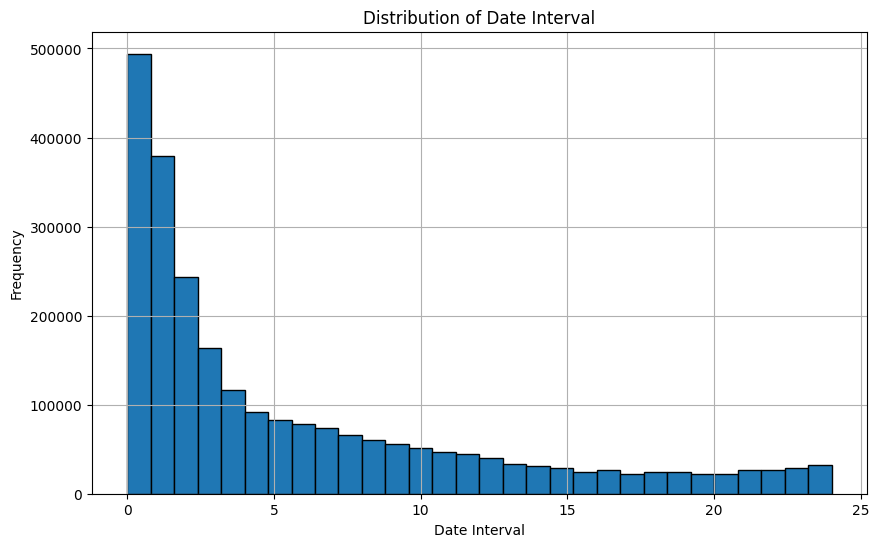

In [7]:
# 7. date_interval의 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(levelups_ref['date_interval'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Date Interval')
plt.xlabel('Date Interval')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [27]:
check=levelups_ref[levelups_ref['character_slug']=='꼴딱']
check.to_csv('check.csv',index=False,encoding='cp949')

In [12]:
time_played = levelups_ref.groupby(["player_slug","character_slug"])["date_interval"].max()

In [19]:
time_played

player_slug               character_slug
2021-10-31T16:01:57.631Z  킹덤                5.426389
2021-10-31T23:13:52.512Z  야들야들맨             0.221944
2021-11-01T00:29:22.357Z  Victor            0.086389
2021-11-01T03:34:17.980Z  유령                0.140556
2021-11-01T05:12:15.383Z  qkiiizzz          0.165278
                                              ...   
2022-03-30T13:53:30.032Z  헨리                0.766667
2022-03-30T14:09:03.502Z  별빛처럼              0.317778
2022-03-30T14:13:23.546Z  sheal             0.732222
2022-03-30T14:20:04.049Z  타이풍               0.447778
2022-03-30T14:36:22.522Z  킹키킹               0.236667
Name: date_interval, Length: 59342, dtype: float64

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

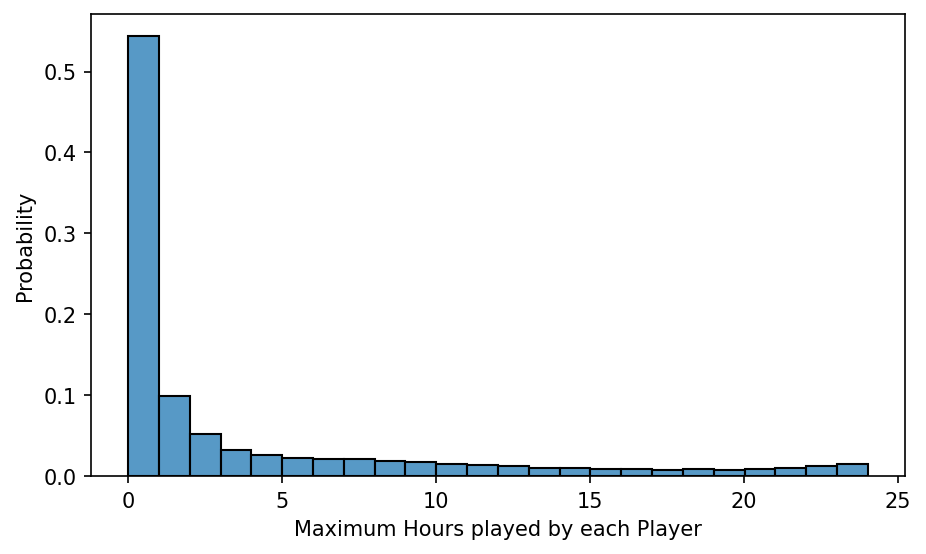

In [14]:
plt.rcParams["figure.figsize"] = [7,4]; plt.rcParams["figure.dpi"] = 150
sns.histplot(time_played, binwidth=1, stat="probability")
plt.xlabel("Maximum Hours played by each Player")
plt.show()

In [18]:
max_interval_per_player = levelups_ref.loc[levelups_ref.groupby('player_slug')['interval'].idxmax()]

max_interval_per_player['date_interval'].quantile(0.8)

3.5956666666666646

In [21]:
max_interval_per_player['binge'] = max_interval_per_player['date_interval'].apply(lambda x: 1 if x >= 3.5 else 0)


In [4]:
# 첫 번째 세션에서 각 캐릭터가 도달한 레벨
tmp = levelups_ref.groupby(["player_slug","character_slug"])["first_session_level"].min()

In [5]:
tmp.describe()

count    59342.000000
mean        27.693017
std         27.427233
min          1.000000
25%          7.000000
50%         14.000000
75%         43.000000
max        185.000000
Name: first_session_level, dtype: float64

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

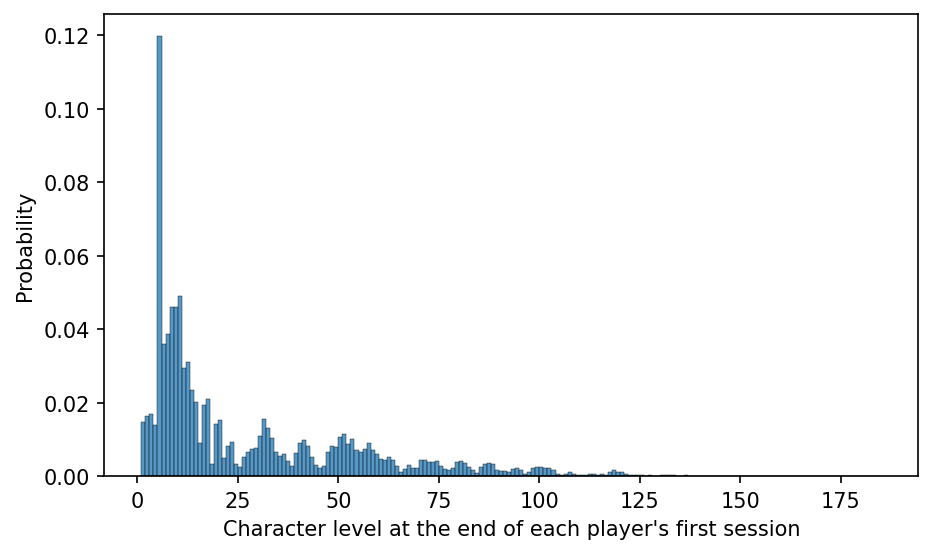

In [6]:
plt.rcParams["figure.figsize"] = [7,4]; plt.rcParams["figure.dpi"] = 150
sns.histplot(tmp, binwidth=1, stat="probability")
plt.xlabel("Character level at the end of each player's first session")
plt.show()

In [8]:
l_qs = [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.20, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375,
        0.4, 0.425, 0.45, 0.475, 0.5]
cutoffs = pd.DataFrame({"cutoff":l_qs})

# quantile level
cutoffs["first_session_level"] = cutoffs["cutoff"].apply(lambda x: np.quantile(tmp, 1-x))

# playing time required to reach each level
tmp_ = levelups_ref.groupby("level_to")["interval_cum"].median().reset_index()
tmp_.columns = ["first_session_level","med_hours_taken"]
cutoffs = pd.merge(cutoffs, tmp_, how="left")

cutoffs["cutoff"] = cutoffs["cutoff"] * 100
cutoffs

,cutoff,first_session_level,med_hours_taken
0,1.0,117.0,28.137778
1,2.5,99.0,18.812917
2,5.0,86.0,10.610278
3,7.5,77.0,7.202222
4,10.0,70.0,4.690417
5,12.5,61.0,3.251944
6,15.0,57.0,2.420694
7,17.5,54.0,2.020833
8,20.0,51.0,1.630556
9,22.5,48.0,1.353889


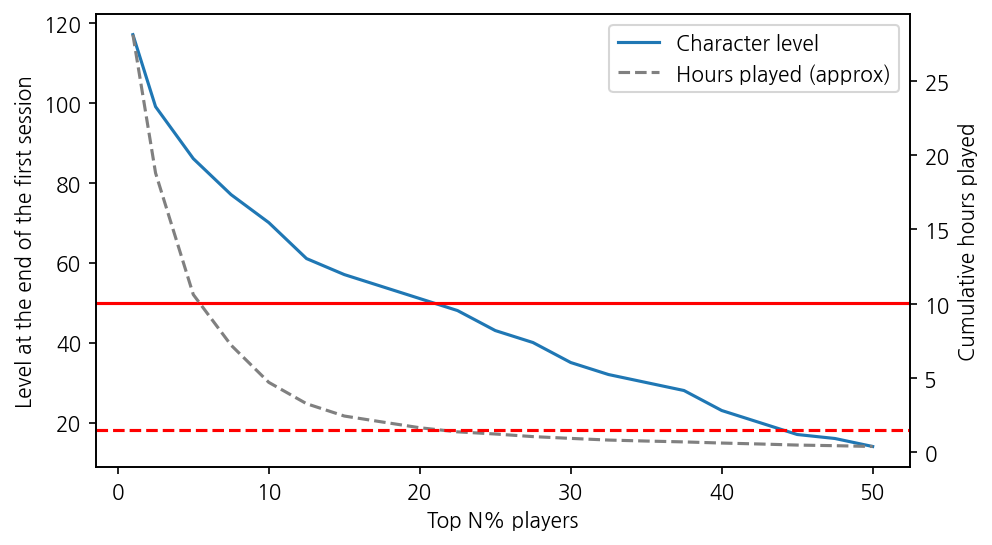

In [9]:
fig, ax = plt.subplots()
line1 = ax.plot(cutoffs["cutoff"], cutoffs["first_session_level"], label="Character level")
ax.set_xlabel("Top N% players")
ax.set_ylabel("Level at the end of the first session")

ax2 = ax.twinx()
line2 = ax2.plot(cutoffs["cutoff"], cutoffs["med_hours_taken"], label="Hours played (approx)", color="grey", ls="--")
ax2.set_ylabel("Cumulative hours played")

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax.legend(lines, labels, loc='upper right')
ax.axhline(50, color="red")
ax2.axhline(1.5, color="red", ls="--")
plt.show()

* first_session_level이 50 이상인 플레이어들을 binger로 정의해보았다.

In [10]:
cutoff_binger_lv = 50

In [23]:
levelups_ref = levelups_ref.merge(max_interval_per_player[['player_slug', 'binge']], on='player_slug', how='left')


In [24]:
levelups_ref

,player_slug,character_slug,first_session_level,total_purchase,total_ad,highest_level,status,level_from,level_to,event_datetime,death,ad_revival,ad_item,ad_total,purchase,event_datetime_prev,interval,interval_cum,playtime_boss,playtime_dungeon,playtime_tower,playtime_pvp,playtime_farm,playtime_survival,playtime_side,date_event,date_event_prev,same_date,date_interval,binge
0,2021-10-31T16:01:57.631Z,킹덤,2,0.0,0.0,7,complete,1,2,2021-11-04 23:42:28,0.0,0.0,0.0,0.0,0.0,2021-11-04 23:41:55,0.009444,0.009444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-11-04,2021-11-04,True,0.009444,1
1,2021-10-31T16:01:57.631Z,킹덤,2,0.0,0.0,7,complete,2,3,2021-11-13 07:50:45,0.0,0.0,0.0,0.0,0.0,2021-11-04 23:42:28,200.138333,200.147778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-11-13,2021-11-04,False,5.426389,1
2,2021-10-31T16:01:57.631Z,킹덤,2,0.0,0.0,7,complete,3,4,2021-11-13 07:52:19,0.0,0.0,0.0,0.0,0.0,2021-11-13 07:50:45,0.026389,200.174167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-11-13,2021-11-13,True,5.426389,1
3,2021-10-31T16:01:57.631Z,킹덤,2,0.0,0.0,7,complete,4,5,2021-11-13 13:11:55,0.0,0.0,0.0,0.0,0.0,2021-11-13 07:52:19,5.326944,205.501111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-11-13,2021-11-13,True,5.426389,1
4,2021-10-31T16:01:57.631Z,킹덤,2,0.0,0.0,7,complete,5,6,2021-11-13 13:15:02,0.0,0.0,0.0,0.0,0.0,2021-11-13 13:11:55,0.052222,205.553333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-11-13,2021-11-13,True,5.426389,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466992,2022-03-30T14:36:22.522Z,킹키킹,8,0.0,0.0,8,complete,3,4,2022-03-30 23:44:15,0.0,0.0,0.0,0.0,0.0,2022-03-30 23:42:14,0.033889,0.084444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-03-30,2022-03-30,True,0.236667,0
2466993,2022-03-30T14:36:22.522Z,킹키킹,8,0.0,0.0,8,complete,4,5,2022-03-30 23:46:19,0.0,0.0,0.0,0.0,0.0,2022-03-30 23:44:15,0.034722,0.119167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-03-30,2022-03-30,True,0.236667,0
2466994,2022-03-30T14:36:22.522Z,킹키킹,8,0.0,0.0,8,complete,5,6,2022-03-30 23:47:29,0.0,0.0,0.0,0.0,0.0,2022-03-30 23:46:19,0.019722,0.138889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-03-30,2022-03-30,True,0.236667,0
2466995,2022-03-30T14:36:22.522Z,킹키킹,8,0.0,0.0,8,complete,6,7,2022-03-30 23:48:48,0.0,0.0,0.0,0.0,0.0,2022-03-30 23:47:29,0.022222,0.161111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-03-30,2022-03-30,True,0.236667,0


In [11]:
tmp = tmp.reset_index()
tmp["binger"] = np.where(tmp["first_session_level"]>=cutoff_binger_lv, 1, 0)

In [12]:
levelups_ref = pd.merge(tmp, levelups_ref, how="left")

In [26]:
levelups_ref.groupby("binge")["player_slug"].nunique()

binge
0    47858
1    11484
Name: player_slug, dtype: int64

In [31]:
levelups_ref.query("binger==1").player_slug.nunique() / levelups_ref.player_slug.nunique()

0.21679417613157628

In [28]:
levelups_ref.query("binge==1").player_slug.nunique() / levelups_ref.player_slug.nunique()

0.19352229449630953

In [15]:
levelups_ref.to_csv("../data/levelups_panel_20240305.csv", index=None, encoding="utf-8")

* EDA

In [29]:

binge_groups = levelups_ref.groupby('binge').agg({'purchase': 'sum', 'player_slug': pd.Series.nunique}).reset_index()
binge_groups['purchase_per_player'] = binge_groups['purchase'] / binge_groups['player_slug']


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

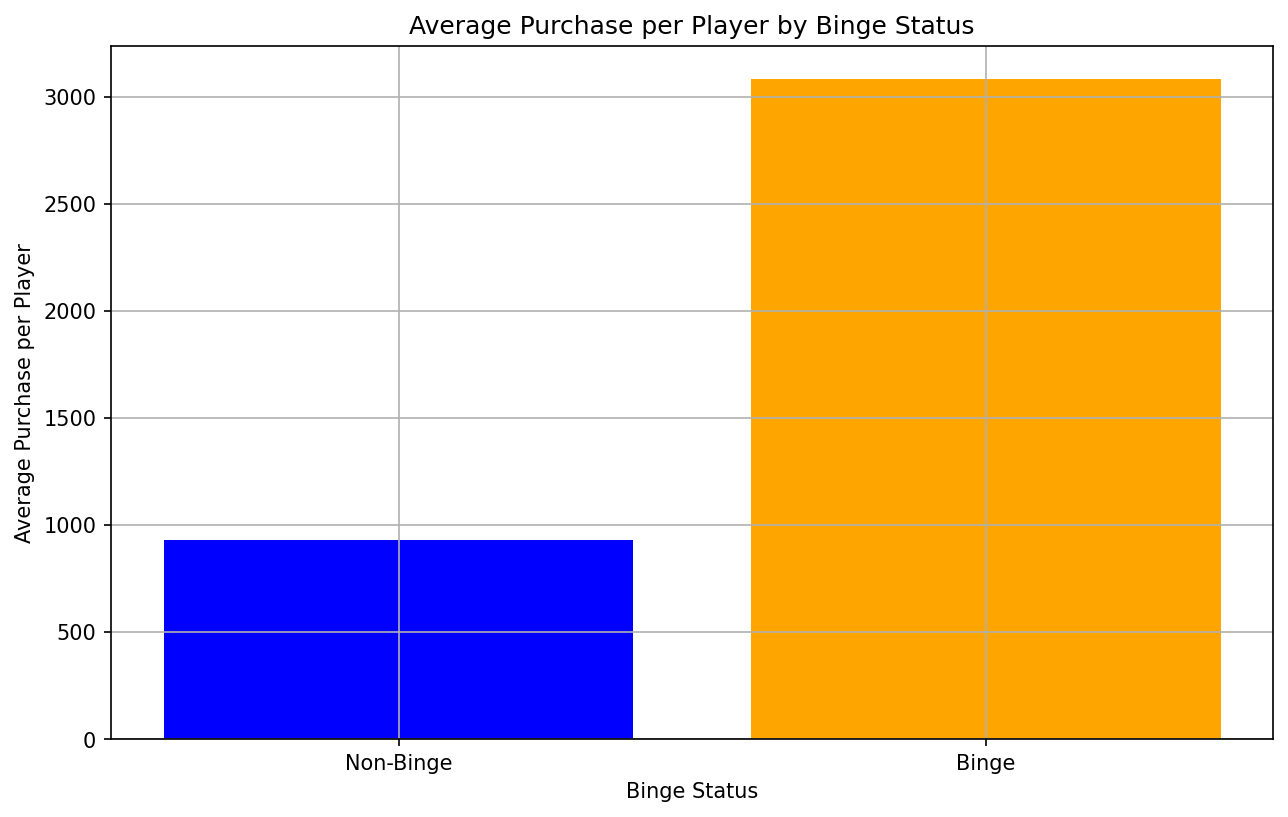

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(binge_groups['binge'], binge_groups['purchase_per_player'], color=['blue', 'orange'], tick_label=['Non-Binge', 'Binge'])
plt.title('Average Purchase per Player by Binge Status')
plt.xlabel('Binge Status')
plt.ylabel('Average Purchase per Player')
plt.grid(True)
plt.show()

21706


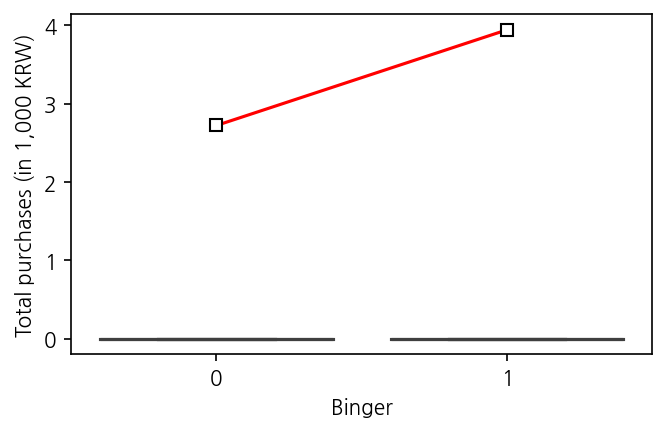

In [26]:
tmp_ = levelups_ref.query("highest_level>=50").reset_index(drop=True)
print(tmp_.player_slug.nunique())
tmp = (tmp_.groupby(["player_slug"])["purchase"].sum()/1000).reset_index()
tmp = pd.merge(tmp_[["player_slug","binger"]].drop_duplicates().reset_index(drop=True), tmp, how="left")
yvar = "purchase"

plt.rcParams["figure.figsize"] = (5,3); plt.figure(dpi=150)
g = sns.boxplot(data=tmp, x="binger", y=yvar, showfliers=False, showmeans=True,
                meanprops={"marker":"s","markerfacecolor":"white","markeredgecolor":"black"},)

tmp_ = tmp.groupby("binger")[yvar].mean().reset_index()
g = sns.lineplot(data=tmp_, x="binger", y=yvar, color="red")

plt.xlabel("Binger"); plt.ylabel("Total purchases (in 1,000 KRW)")
plt.show()

In [16]:
v_level = 50

In [17]:
# Drop players who reached under the level
tmp = levelups_ref.query("highest_level>=@v_level")

# Focus on levelups under the level
tmp = tmp.query("level_from<@v_level").reset_index(drop=True)
tmp_b = tmp.query("binger==1").reset_index(drop=True)
tmp_nb = tmp.query("binger==0").reset_index(drop=True)

print(tmp.player_slug.nunique())

# long to wide and then save
# interval_cum, interval, playtime_side, purchase, ad_total, death,
# playtime_dungeon, playtime_tower, 
v = "death"

tmp = tmp.pivot(index="player_slug", columns="level_from", values=v)
tmp_b = tmp_b.pivot(index="player_slug", columns="level_from", values=v)
tmp_nb = tmp_nb.pivot(index="player_slug", columns="level_from", values=v)

# tmp.to_csv("../data/rainbow_plots/"+v+".csv", index=None) # rainbox plot 위한 파일 export

21706


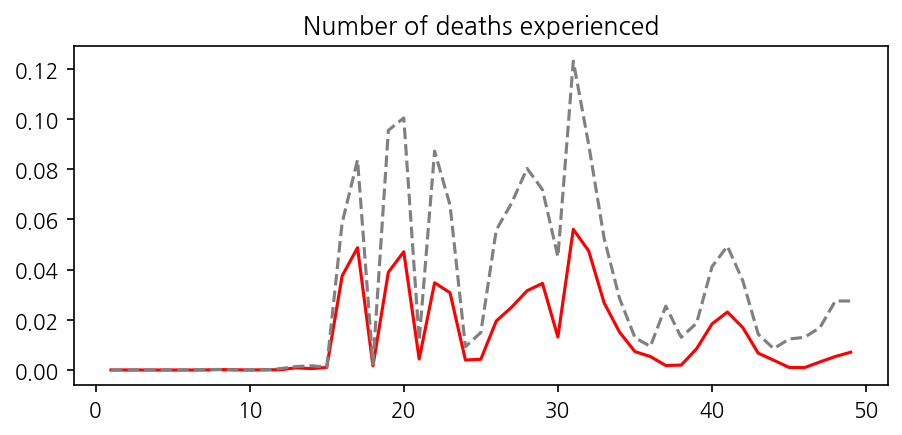

In [18]:
plt.rcParams["figure.figsize"] = [7,3]; plt.rcParams["figure.dpi"] = 150
tmp_b.mean().plot(color="red")
tmp_nb.mean().plot(color="grey", ls="--")

l_titles = ["Hours taken to progress","Hours of playing side quests","In-app purchases made (in KRW)",
            "Number of ads watched","Number of deaths experienced"]
plt.title(l_titles[4]) # 리스트 index를 바꿔가면서 plot 생성
plt.xlabel("")
plt.show()